In [1]:
import numpy as np
import pandas as pd
import random
import math
import copy
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import minimize

from scipy import optimize
from scipy.optimize import minimize_scalar
from operator import itemgetter

# Hooke — Jeeves algorithm


In [2]:
def f_cs(funcAddr, point, delta):
  #print("coordinate search runs...")
  p=point
  p_xr=np.array([ p[0]+delta, p[1] ])
  p_xl=np.array([ p[0]-delta, p[1] ])
  p_yu=np.array([ p[0], p[1]+delta ])
  p_yd=np.array([ p[0], p[1]-delta ])
  p_ur=np.array([ p[0]+delta, p[1]+delta ])
  p_ul=np.array([ p[0]-delta, p[1]+delta ])
  p_dr=np.array([ p[0]+delta, p[1]-delta ])
  p_dl=np.array([ p[0]-delta, p[1]-delta ])
  function=funcAddr()
  #print ("searching in the set of such points: ", p,p_xr, p_xl,p_yu, p_yd )
  #print ("function costs from each point: ", function(p), function(p_xr), function(p_xl), function(p_yu), function(p_yd) )
  m = min( function(p), function(p_xr), function(p_xl), function(p_yu), function(p_yd), function(p_ur), function(p_ul), function(p_dr),function(p_dl) )
 
  if m==function(p):
    #print("found point with least function cost with coordinates: ", p)
    return p
  elif m==function(p_xr):
    #print("found point with least function cost with coordinates: ", p_xr)
    return p_xr
  elif m==function(p_xl):
    #print("found point with least function cost with coordinates: ", p_xl)
    return p_xl
  elif m==function(p_yu):
    #print("found point with least function cost with coordinates: ", p_yu)
    return p_yu
  elif m==function(p_yd):
    #print("found point with least function cost with coordinates: ", p_yd)
    return p_yd
  elif m==function(p_ur):
    #print("found point with least function cost with coordinates: ", p_ur)
    return p_ur
  elif m==function(p_ul):
    #print("found point with least function cost with coordinates: ", p_ul)
    return p_ul
  elif m==function(p_dr):
    #print("found point with least function cost with coordinates: ", p_dr)
    return p_dr
  elif m==function(p_dl):
    #print("found point with least function cost with coordinates: ", p_dl)
    return p_dl


#usage
#print(f_cs(f1, x_0, 1.4))


def hook_jeeves(funcAddr):
  x_b=np.array([0,0])
  x_s=np.array([0,0])
  x_p=np.array([0,0])
  x_q=np.array([0,0])
  x_Star=np.array([0,0])

  success_flag=0
  steps=[]


  #print("1.\n")

  #starting point
  x_0=np.array([0,0])
  x_0[0]=random.randint(0, 5)
  x_0[1]=random.randint(0, 5)

  steps.append((x_0[0], x_0[1]))

  print("random initial point is x_0 = [", x_0[0],", ", x_0[1], "] ")
  #step for coordinate search 
  h=np.array([1,1])
  #print("h =", h)
  #accuracy
  epsilon=0.00001
  print("epsilon =", epsilon)

  #print("\n2.\n")

  x_b=x_0
  #print("x_b = ", x_b)
  delta=module(h)
  print("delta = ", delta)



  while success_flag==0:
    while success_flag==0:
      #print("\n3.\n")
      x_s=f_cs(funcAddr, x_b, delta)
      if np.array_equal(x_s, x_b):
        #print("\n4.1\n")
        delta=delta/10
        if delta<epsilon:
          #print("\n4.2.1\n")
          success_flag=1
          x_Star=x_s
          print("x_Star = [ ", f"{ x_s[0] :.9f}",", ", f"{ x_s[1] :.9f}"," ]")
          break
        else:
          #print("\n4.2.2\n")
          continue
      else:
        while success_flag==0:
          #print("\n4.3\n")
          x_p=x_b+2.4*(x_s-x_b) #lambda is generally taken between 2.3-2.5
          x_b=x_s
          steps.append((x_b[0], x_b[1]))
          #print("\n4.4\n")
          x_q=f_cs(funcAddr, x_p, delta)
          func=funcAddr()
          if func(x_q)<func(x_s):
            #print("\n4.5.1\n")
            x_s=x_q
            continue 
          else:
            
          
            break
    
    break
  return x_Star, steps

In [4]:
def f_spherical():
    return lambda x: x[0]**2+x[1]**2

def f_himmelblau():
    return lambda x: (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

def f_multimodal():
    return lambda x: x[0]**2+x[1]**2-math.cos(18*x[0])-math.cos(18*x[1])

In [3]:
def contoursteps(x1, x2, x3, steps=None):
    fig = plt.figure(figsize=(10,10))
    cp = plt.contour(x1, x2, x3, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')

def f_plot(function, diapason):
    fig = plt.figure(figsize=(4,4))
    qf = fig.gca(projection='3d')
    size = 50
    x1 = list(np.linspace(-diapason, diapason, size))
    x2 = list(np.linspace(-diapason, diapason, size))
    x1, x2 = np.meshgrid(x1, x2)
    x3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x3[i,j] = function((x1[i,j],x2[i,j]))
    qf.plot_surface(x1, x2, x3, rstride=1, cstride=1, cmap='Spectral', linewidth=0)
    return x1, x2, x3

def module(x): 
    return math.sqrt(sum(i**2 for i in x))


## Target functions

### Himmelblau function

$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$




local min:

$1. (3, 2)$

$2. (-2.805118..., 3.131312...)$

$3. (-3.779310..., -3.283186...)$

$4. (3.584428..., -1.848126...)$


Range: [-5.12, 5.12]

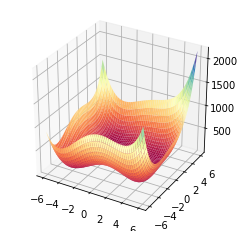

In [5]:
x1, x2, x3 = f_plot(f_himmelblau(), 6)

### Spherical function (DeJong №1)
$f(x)=\sum_{i=1}^n x_i^2$

in our case

$f(x,y)=x^2+y^2$


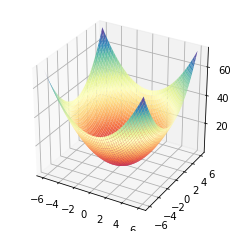

In [6]:
x1, x2, x3 = f_plot(f_spherical(), 6)

local min: (0, 0)

Range: [-5.12, 5.12]

### Multimodal function №1
$f(x,y)=x^2+y^2-cos(18x)-cos(18y)$

Function has many local mins

Range: [-1, 1]

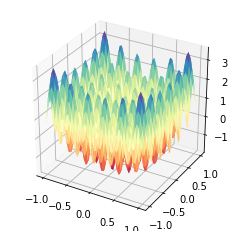

In [7]:
x1, x2, x3 = f_plot(f_multimodal(), 1)

## Demonstration of the work of the algorithm on



### Himmelblau function:

 $f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

In [8]:
min_himmelblau, steps_himmelblau = hook_jeeves(f_himmelblau)

random initial point is x_0 = [ 1 ,  5 ] 
epsilon = 1e-05
delta =  1.4142135623730951
x_Star = [  3.000001185 ,  1.999997657  ]


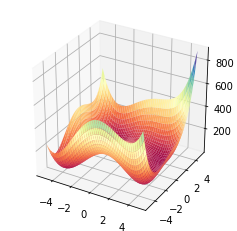

In [9]:
x1, x2, x3 = f_plot(f_himmelblau(), 5)

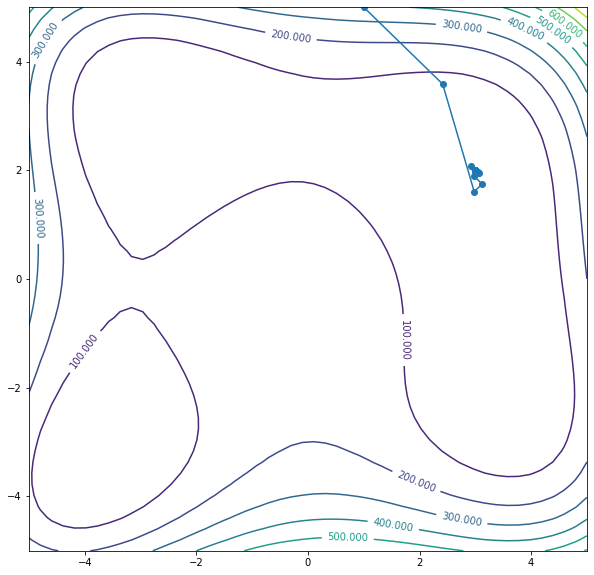

In [10]:
contoursteps(x1, x2, x3, steps_himmelblau)

### Spherical function (DeJong №1):

$f(x,y)=x^2+y^2$

In [11]:
min_spherical, steps_spherical = hook_jeeves(f_spherical)

random initial point is x_0 = [ 2 ,  5 ] 
epsilon = 1e-05
delta =  1.4142135623730951
x_Star = [  -0.000003447 ,  -0.000002961  ]


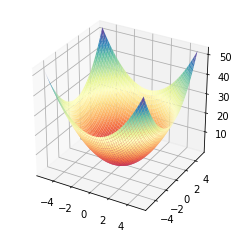

In [12]:
x1, x2, x3 = f_plot(f_spherical(), 5.12)

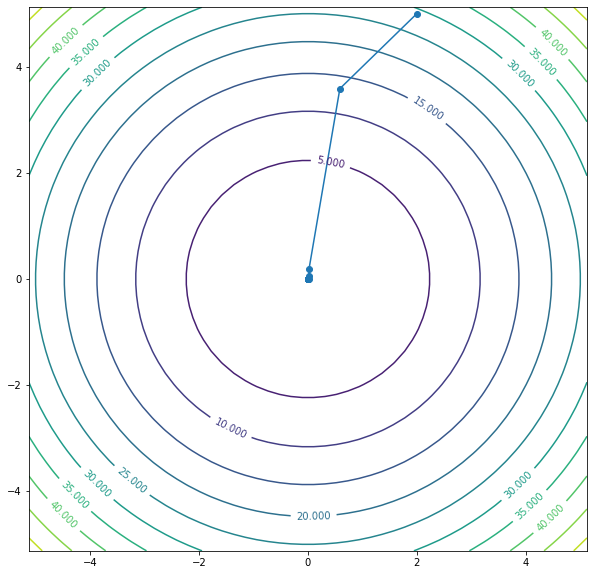

In [13]:
contoursteps(x1, x2, x3, steps_spherical)

### Multimodal function №1:

$f(x,y)=x^2+y^2-cos(18x)-cos(18y)$

In [14]:
min_multimodal, steps_multimodal = hook_jeeves(f_multimodal)

random initial point is x_0 = [ 5 ,  0 ] 
epsilon = 1e-05
delta =  1.4142135623730951
x_Star = [  0.346922632 ,  0.000000000  ]


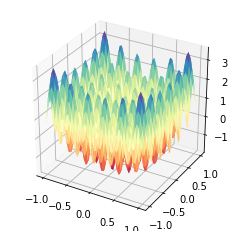

In [15]:
x1, x2, x3 = f_plot(f_multimodal(), 1)

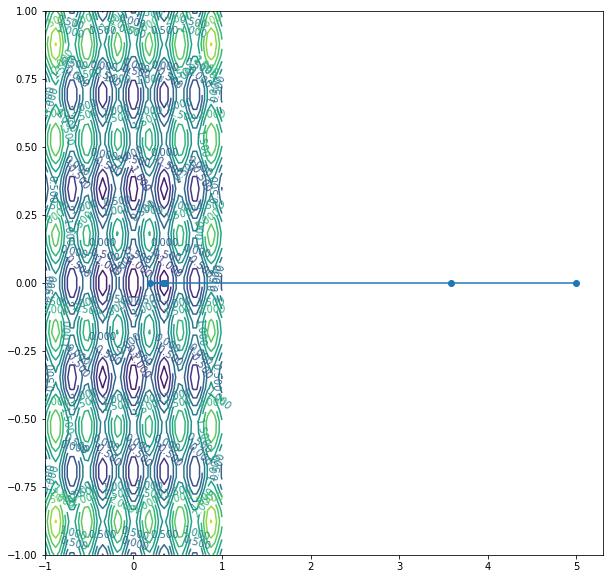

In [16]:
contoursteps(x1, x2, x3, steps_multimodal)